# 根据词频进行活动聚类

# 1、数据读取与PCA降维

由于不同关键词之间可能有一些词的词频之间存在一定线性关系，所以我认为聚类之前可以尝试适当的PCA降维

In [4]:
#导入必要的工具包
import pandas as pd
import numpy as np
from sklearn import svm# 1、由于不同关键词之间可能有一些词的词频之间存在一定线性关系，所以我认为聚类之前可以尝试适当的PCA降维
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time

In [24]:
#读取活动数据
edata = pd.read_csv('eventdata.csv')
#数据概览
#edata.head()

In [25]:
#数据统计信息
#edata.describe()

In [26]:
#删掉不需要的特征列
edata = edata.drop("Unnamed: 0",axis=1)
edata = edata.drop("event_id",axis=1)
edata = edata.drop("user_id",axis=1)
edata = edata.drop("lat",axis=1)
edata = edata.drop("lng",axis=1)
edata = edata.drop("start_time",axis=1)
edata = edata.drop("city",axis=1)
edata = edata.drop("state",axis=1)
edata = edata.drop("zip",axis=1)
edata = edata.drop("country",axis=1)

In [27]:
edata.head()

c_1  c_2  c_3  c_4  c_5  c_6  c_7  c_8  c_9  c_10   ...     c_92  c_93  \
0    0    0    0    0    0    3    0    0    0     0   ...        0     0   
1    1    2    0    0    0    0    0    0    0     0   ...        0     0   
2    0    0    0    0    0    0    0    0    0     0   ...        0     0   
3    2    0    0    0    2    0    0    0    0     0   ...        0     0   
4   18    7    7    3    9    4    2    0    2     2   ...        0     0   

   c_94  c_95  c_96  c_97  c_98  c_99  c_100  c_other  
0     0     0     0     0     0     0      0       27  
1     0     0     0     1     0     0      0       39  
2     0     0     0     0     0     0      0        2  
3     0     0     0     0     0     0      0        3  
4     1     0     1     2     0     0      1      249  

[5 rows x 101 columns]

In [28]:
#数据统计信息
edata.describe()

c_1           c_2           c_3           c_4           c_5  \
count  13418.000000  13418.000000  13418.000000  13418.000000  13418.000000   
mean       2.359964      1.464972      1.323372      0.888732      1.159711   
std       19.331141      2.959769      2.720104      1.972209     15.695718   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      2.000000      2.000000      1.000000      1.000000   
max     2186.000000     82.000000     85.000000     71.000000   1801.000000   

                c_6           c_7           c_8           c_9          c_10  \
count  13418.000000  13418.000000  13418.000000  13418.000000  13418.000000   
mean       2.479654      0.986809      0.584439      0.660754      0.552914   
std        7.375475     18.371845      1.395134      1.630597      1.243510   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.000000      1.000000      1.000000      1.000000      1.000000   
max      306.000000   2120.000000     23.000000     51.000000     51.000000   

           ...               c_92          c_93          c_94          c_95  \
count      ...       13418.000000  13418.000000  13418.000000  13418.000000   
mean       ...           0.064913      0.083992      0.093755      0.070502   
std        ...           0.309890      0.377730      0.388404      0.312148   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           7.000000      9.000000     10.000000      9.000000   

               c_96          c_97          c_98          c_99         c_100  \
count  13418.000000  13418.000000  13418.000000  13418.000000  13418.000000   
mean       0.082427      0.233790      0.082874      0.076837      0.073558   
std        0.503164     15.553234      0.356777      0.455338      0.337954   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       23.000000   1801.000000      9.000000     16.000000      7.000000   

            c_other  
count  13418.000000  
mean      57.554777  
std      110.916584  
min        0.000000  
25%       14.000000  
50%       38.000000  
75%       75.000000  
max     9664.000000  

[8 rows x 101 columns]

In [29]:
edata=np.array(edata)
edata

array([[ 0,  0,  0, ...,  0,  0, 27],
       [ 1,  2,  0, ...,  0,  0, 39],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 3,  1,  2, ...,  0,  0, 18],
       [ 2,  0,  0, ...,  0,  0, 65],
       [ 0,  0,  0, ...,  0,  0,  8]], dtype=int64)

In [30]:
#数据归一化
from sklearn.preprocessing import MinMaxScaler as MM
mm=MM()
edata=mm.fit_transform(edata)
edata

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00279387],
       [0.00045746, 0.02439024, 0.        , ..., 0.        , 0.        ,
        0.0040356 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00020695],
       ...,
       [0.00137237, 0.01219512, 0.02352941, ..., 0.        , 0.        ,
        0.00186258],
       [0.00091491, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00672599],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00082781]])

In [435]:
# 原始输入的特征维数和样本数目
print('the shape of train_image: {}'.format(edata.shape))

the shape of train_image: (13418L, 101L)


In [436]:
#进行PCA降维
#pca = PCA(n_components=0.99)

#pca.fit(edata)
#edata_pca = pca.transform(edata)

In [437]:
#pca.n_components_

In [438]:
#降维后的特征维数
#print(edata_pca.shape)

PCA降维过程我统一到了后面的for循环里，与K一起搜索。可根据聚类效果看多大的降维比例系数更合适

# 2、进行K-Means聚类

In [439]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [440]:
# 一个参数点（聚类数据为K）的模型，在校验集上评价聚类算法性能
def K_cluster_analysis(K, X_train, X_val):
    start = time.time()
    
    print("K-means begin with clusters: {}".format(K));
    
    #K-means,在训练集上训练
    mb_kmeans = MiniBatchKMeans(n_clusters = K)
    mb_kmeans.fit(X_train)
    
    # 在训练集和校验集上测试
    #y_train_pred = mb_kmeans.fit_predict(X_train)
    y_val_pred = mb_kmeans.predict(X_val)
    
    # K值的评估标准
    #常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index
    #这两个分数值越大则聚类效果越好
    #CH_score_train = metrics.calinski_harabaz_score(X_train,mb_kmeans.predict(X_train))
    CH_score_val = metrics.silhouette_score(X_val,mb_kmeans.predict(X_val))
    
    end = time.time()
    #print("CH_score on train: {}, time elaps:{}".format(CH_score_train, int(end-start)))
    print("CH_score on val: {}".format(CH_score_val))
    
    return CH_score_val

In [441]:
# 一个参数点（主成分比例为n_components）的数据集，并划分训练集与校验集，显示降维后的数据维度
def pca_analysis(data,n_components=None):
    pca = PCA(n_components)
    pca.fit(data)
    data_pca = pca.transform(data)
    X_train_part, X_val = train_test_split(data_pca, train_size = 0.8,random_state = 3)
    print("当主成分比例为:{},降维后的数据维度为: {}".format(n_components,data_pca.shape))
    return X_train_part, X_val

In [442]:
import copy
# 设置超参数（聚类数目K）和PCA主成分比例的搜索范围
Ks = [2,3,4,5,8,10, 20, 30,40,50,60,70,80,90,100]
ns=[0.7,0.75,0.8,0.85,0.9,0.95,0.99]

edata1=copy.deepcopy(edata) #保证每次PCA降维都在原始数据上进行

CH_scores_val = []

for n in ns:
    print("_______________________________________________")
    X_train_part, X_val=pca_analysis(edata1,n_components=n)
    print("                                               ")
    
    for K in Ks:
        ch1 = K_cluster_analysis(K, X_train_part, X_val)
        CH_scores_val.append(ch1)
        
    edata1=copy.deepcopy(edata)

_______________________________________________
当主成分比例为:0.7,降维后的数据维度为: (13418L, 32L)
                                               
K-means begin with clusters: 2
CH_score on val: 0.531237878455
K-means begin with clusters: 3
CH_score on val: 0.462936788121
K-means begin with clusters: 4
CH_score on val: 0.387548352048
K-means begin with clusters: 5
CH_score on val: 0.330627184174
K-means begin with clusters: 8
CH_score on val: 0.119023862972
K-means begin with clusters: 10
CH_score on val: 0.318275403843
K-means begin with clusters: 20
CH_score on val: 0.131279744178
K-means begin with clusters: 30
CH_score on val: 0.158570518399
K-means begin with clusters: 40
CH_score on val: 0.0744470312526
K-means begin with clusters: 50
CH_score on val: 0.0745674538135
K-means begin with clusters: 60
CH_score on val: 0.0483996564342
K-means begin with clusters: 70
CH_score on val: -0.0933488163794
K-means begin with clusters: 80
CH_score on val: -0.13897693591
K-means begin with clusters: 90
CH_

可以看到，当主成分比例为0.9，K=2时，在校验集上的CH-scoring有最大值，为0.6081,随着K的增大，其相应的CH分数也开始下降。

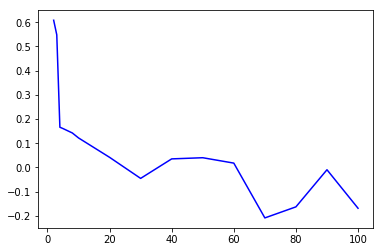

In [449]:
# 绘制主成分比例为0.9时（即CH_scores_val中第61~75个数据）不同K下的CH分数
plt.plot(Ks, np.array(CH_scores_val[60:75]), 'b-')

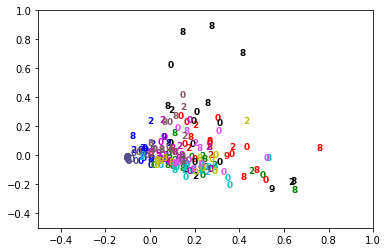

In [33]:
#十分类的聚类结果大概显示
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import copy
#进行主成分比例为0.9的PCA降维，全部数据进行聚类
edata2=copy.deepcopy(edata)
pca = PCA(n_components=0.9)

pca.fit(edata2)
edata2_pca = pca.transform(edata2)

mb_kmeans = MiniBatchKMeans(n_clusters = 10)
mb_kmeans.fit(edata2)
#显示聚类结果
#画出聚类结果，每一类用一种颜色
colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868']

n_clusters = 10

y_train_pred = mb_kmeans.labels_
cents = mb_kmeans.cluster_centers_#质心

for i in range(n_clusters):
    index = np.nonzero(y_train_pred==i)[0]
    x1 = edata_pca[index,0]
    x2 = edata_pca[index,1]
   # y_i = y_train[index]
    for j in range(len(x1)):
        if j < 20:  #每类打印20个
            plt.text(x1[j],x2[j],str(int(y_train_pred[j])),color=colors[i],\
                fontdict={'weight': 'bold', 'size': 9})
    #plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=12)

plt.axis([-0.5,1,-0.5,1])
plt.show()

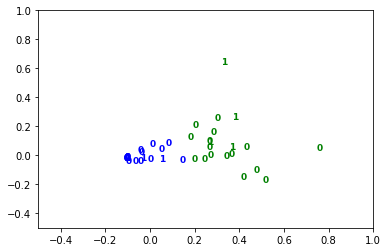

In [35]:
#二分类的聚类结果大概显示
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import copy
#进行主成分比例为0.9的PCA降维，全部数据进行聚类
edata3=copy.deepcopy(edata)
pca = PCA(n_components=0.9)

pca.fit(edata3)
edata3_pca = pca.transform(edata3)

mb_kmeans = MiniBatchKMeans(n_clusters = 2)
mb_kmeans.fit(edata3)
#显示聚类结果
#画出聚类结果，每一类用一种颜色
colors = ['b','g']

n_clusters = 2

y_train_pred = mb_kmeans.labels_
cents = mb_kmeans.cluster_centers_#质心

for i in range(n_clusters):
    index = np.nonzero(y_train_pred==i)[0]
    x1 = edata3_pca[index,0]
    x2 = edata3_pca[index,1]
   # y_i = y_train[index]
    for j in range(len(x1)):
        if j < 20:  #每类打印20个
            plt.text(x1[j],x2[j],str(int(y_train_pred[j])),color=colors[i],\
                fontdict={'weight': 'bold', 'size': 9})
    #plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=12)

plt.axis([-0.5,1,-0.5,1])
plt.show()